# Hyperparameter Optimization -- Different Models

# An example of a classification problem's code
the MNIST dataset from sklearn

The following machine learning methods were used: k-nearest neighbour (KNN), support vector machine (SVM), random forest (RF), and artificial neural network (ANN)

Grid search, random search, hyperband, Bayesian optimization with Gaussian processes (BO-GP), Bayesian optimization with tree-structured Parzen estimator (BO-TPE), particle swarm optimization (PSO), and genetic algorithms are examples of HPO techniques that were utilised (GA).

Performance metric: Correct classification

In [5]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split,cross_val_score
from sklearn.ensemble import RandomForestClassifier,RandomForestRegressor
from sklearn.metrics import classification_report,confusion_matrix,accuracy_score
from sklearn.neighbors import KNeighborsClassifier,KNeighborsRegressor
from sklearn.svm import SVC,SVR
from sklearn import datasets
import scipy.stats as stats

Add the MNIST dataset.                                                                                                                
A sizable library of handwritten numbers called the MNIST database (Modified National Institute of Standards and Technology database) is frequently used to train different image processing algorithms. A training set of 60,000 instances and a test set of 10,000 examples are both present in the MNIST database. It is a portion of a bigger collection that is made public by NIST. The digits have been centred in a fixed-size picture and size-normalized.

In [6]:
d = datasets.load_digits()
X = d.data
y = d.target

In [7]:
d

{'data': array([[ 0.,  0.,  5., ...,  0.,  0.,  0.],
        [ 0.,  0.,  0., ..., 10.,  0.,  0.],
        [ 0.,  0.,  0., ..., 16.,  9.,  0.],
        ...,
        [ 0.,  0.,  1., ...,  6.,  0.,  0.],
        [ 0.,  0.,  2., ..., 12.,  0.,  0.],
        [ 0.,  0., 10., ..., 12.,  1.,  0.]]),
 'target': array([0, 1, 2, ..., 8, 9, 8]),
 'frame': None,
 'feature_names': ['pixel_0_0',
  'pixel_0_1',
  'pixel_0_2',
  'pixel_0_3',
  'pixel_0_4',
  'pixel_0_5',
  'pixel_0_6',
  'pixel_0_7',
  'pixel_1_0',
  'pixel_1_1',
  'pixel_1_2',
  'pixel_1_3',
  'pixel_1_4',
  'pixel_1_5',
  'pixel_1_6',
  'pixel_1_7',
  'pixel_2_0',
  'pixel_2_1',
  'pixel_2_2',
  'pixel_2_3',
  'pixel_2_4',
  'pixel_2_5',
  'pixel_2_6',
  'pixel_2_7',
  'pixel_3_0',
  'pixel_3_1',
  'pixel_3_2',
  'pixel_3_3',
  'pixel_3_4',
  'pixel_3_5',
  'pixel_3_6',
  'pixel_3_7',
  'pixel_4_0',
  'pixel_4_1',
  'pixel_4_2',
  'pixel_4_3',
  'pixel_4_4',
  'pixel_4_5',
  'pixel_4_6',
  'pixel_4_7',
  'pixel_5_0',
  'pixel_5_1',
 

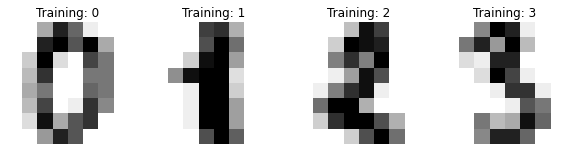

In [8]:
_, axes = plt.subplots(nrows=1, ncols=4, figsize=(10, 3))
for ax, image, label in zip(axes, d.images, d.target):
    ax.set_axis_off()
    ax.imshow(image, cmap=plt.cm.gray_r, interpolation="nearest")
    ax.set_title("Training: %i" % label)
plt.show()

# Classifiers with Default Hyperparameters for Baseline Machine Learning Models

Cross-validation with 3-Fold

In [9]:
#Random Forest
clf = RandomForestClassifier()
clf.fit(X,y)
scores = cross_val_score(clf, X, y, cv=3,scoring='accuracy')
print("Accuracy:"+ str(scores.mean()))

Accuracy:0.9387868670005565


In [10]:
#SVM
clf = SVC()
clf.fit(X,y)
scores = cross_val_score(clf, X, y, cv=3,scoring='accuracy')
print("Accuracy:"+ str(scores.mean()))

Accuracy:0.9699499165275459


In [11]:
#KNN
clf = KNeighborsClassifier()
clf.fit(X,y)
scores = cross_val_score(clf, X, y, cv=3,scoring='accuracy')
print("Accuracy:"+ str(scores.mean()))

Accuracy:0.9627156371730662


In [12]:
#ANN
from keras.models import Sequential, Model
from keras.layers import Dense, Input
from sklearn.model_selection import GridSearchCV
from keras.wrappers.scikit_learn import KerasClassifier
from keras.callbacks import EarlyStopping
def ANN(optimizer = 'sgd',neurons=32,batch_size=32,epochs=20,activation='relu',patience=3,loss='categorical_crossentropy'):
    model = Sequential()
    model.add(Dense(neurons, input_shape=(X.shape[1],), activation=activation))
    model.add(Dense(neurons, activation=activation))
    model.add(Dense(10,activation='softmax'))  # 10 is the number of classes in the dataset, you can change it based on your dataset
    model.compile(optimizer = optimizer, loss=loss)
    early_stopping = EarlyStopping(monitor="loss", patience = patience)# early stop patience
    history = model.fit(X, pd.get_dummies(y).values,
              batch_size=batch_size,
              epochs=epochs,
              callbacks = [early_stopping],
              verbose=0) #verbose set to 1 will show the training process
    return model

In [13]:
clf = KerasClassifier(build_fn=ANN, verbose=0)
scores = cross_val_score(clf, X, y, cv=3,scoring='accuracy')
print("Accuracy:"+ str(scores.mean()))

C:\Users\A632631\AppData\Local\Temp\1\ipykernel_11456\2162434965.py:1: DeprecationWarning: KerasClassifier is deprecated, use Sci-Keras (https://github.com/adriangb/scikeras) instead. See https://www.adriangb.com/scikeras/stable/migration.html for help migrating.
  clf = KerasClassifier(build_fn=ANN, verbose=0)


19/19 [==============================] - 0s 1ms/step
Accuracy:0.9877573734001114


# 1. Grid Search

The supplied hyper-parameter setups are all searched.

Advantages:simple to implement.
Disadvantages:Only effective with categorical HPs; time-consuming.

In [14]:
#Random Forest
from sklearn.model_selection import GridSearchCV
# Define the hyperparameter configuration space
rf_params = {
    'n_estimators': [10, 20, 30],
    #'max_features': ['sqrt',0.5],
    'max_depth': [15,20,30,50],
    #'min_samples_leaf': [1,2,4,8],
    #"bootstrap":[True,False],
    "criterion":['gini','entropy']
}
clf = RandomForestClassifier(random_state=0)
grid = GridSearchCV(clf, rf_params, cv=3, scoring='accuracy')
grid.fit(X, y)
print(grid.best_params_)
print("Accuracy:"+ str(grid.best_score_))

{'criterion': 'gini', 'max_depth': 15, 'n_estimators': 30}
Accuracy:0.9360044518642182


In [15]:
#SVM
from sklearn.model_selection import GridSearchCV
rf_params = {
    'C': [1,10, 100],
    "kernel":['linear','poly','rbf','sigmoid']
}
clf = SVC(gamma='scale')
grid = GridSearchCV(clf, rf_params, cv=3, scoring='accuracy')
grid.fit(X, y)
print(grid.best_params_)
print("Accuracy:"+ str(grid.best_score_))

{'C': 10, 'kernel': 'rbf'}
Accuracy:0.9738452977184195


In [16]:
#KNN
from sklearn.model_selection import GridSearchCV
rf_params = {
    'n_neighbors': [2, 3, 5,10,15,20],
}
clf = KNeighborsClassifier()
grid = GridSearchCV(clf, rf_params, cv=3, scoring='accuracy')
grid.fit(X, y)
print(grid.best_params_)
print("Accuracy:"+ str(grid.best_score_))

{'n_neighbors': 3}
Accuracy:0.9682804674457429


In [17]:
#ANN
from sklearn.model_selection import GridSearchCV
rf_params = {
    'optimizer': ['adam','rmsprop','sgd'],
    'activation': ['relu','tanh'],
    'batch_size': [16,32],
    'neurons':[16,32],
    'epochs':[20,50],
    'patience':[2,5]
}
clf = KerasClassifier(build_fn=ANN, verbose=0)
grid = GridSearchCV(clf, rf_params, cv=3,scoring='accuracy')
grid.fit(X, y)
print(grid.best_params_)
print("Accuracy:"+ str(grid.best_score_))

C:\Users\A632631\AppData\Local\Temp\1\ipykernel_11456\3776285433.py:11: DeprecationWarning: KerasClassifier is deprecated, use Sci-Keras (https://github.com/adriangb/scikeras) instead. See https://www.adriangb.com/scikeras/stable/migration.html for help migrating.
  clf = KerasClassifier(build_fn=ANN, verbose=0)


19/19 [==============================] - 0s 1ms/step


KeyboardInterrupt: 

# Bayesian Optimization

Bayesian Optimization with Tree-structured Parzen Estimator (TPE)

Advantages:Effective with all HP kinds.
Maintain dependent conditions.
Disadvantages:poor parallelization ability

In [18]:
#Random Forest
from hyperopt import hp, fmin, tpe, STATUS_OK, Trials
from sklearn.model_selection import cross_val_score, StratifiedKFold
# Define the objective function
def objective(params):
    params = {
        'n_estimators': int(params['n_estimators']), 
        'max_depth': int(params['max_depth']),
        'max_features': int(params['max_features']),
        "min_samples_split":int(params['min_samples_split']),
        "min_samples_leaf":int(params['min_samples_leaf']),
        "criterion":str(params['criterion'])
    }
    clf = RandomForestClassifier( **params)
    score = cross_val_score(clf, X, y, scoring='accuracy', cv=StratifiedKFold(n_splits=3)).mean()
    #print("ROC-AUC {:.3f} params {}".format(score, params))

    return {'loss':-score, 'status': STATUS_OK }
# Define the hyperparameter configuration space
space = {
    'n_estimators': hp.quniform('n_estimators', 10, 100, 1),
    'max_depth': hp.quniform('max_depth', 5, 50, 1),
    "max_features":hp.quniform('max_features', 1, 64, 1),
    "min_samples_split":hp.quniform('min_samples_split',2,11,1),
    "min_samples_leaf":hp.quniform('min_samples_leaf',1,11,1),
    "criterion":hp.choice('criterion',['gini','entropy'])
}

best = fmin(fn=objective,
            space=space,
            algo=tpe.suggest,
            max_evals=20)
print("Random Forest: Hyperopt estimated optimum {}".format(best))

100%|██████████| 20/20 [00:19<00:00,  1.02trial/s, best loss: -0.9154145798553145]
Random Forest: Hyperopt estimated optimum {'criterion': 1, 'max_depth': 27.0, 'max_features': 29.0, 'min_samples_leaf': 3.0, 'min_samples_split': 8.0, 'n_estimators': 45.0}


In [19]:
#SVM
from hyperopt import hp, fmin, tpe, STATUS_OK, Trials
from sklearn.model_selection import cross_val_score, StratifiedKFold
def objective(params):
    params = {
        'C': abs(float(params['C'])), 
        "kernel":str(params['kernel'])
    }
    clf = SVC(gamma='scale', **params)
    score = cross_val_score(clf, X, y, scoring='accuracy', cv=StratifiedKFold(n_splits=3)).mean()

    return {'loss':-score, 'status': STATUS_OK }

space = {
    'C': hp.normal('C', 0, 50),
    "kernel":hp.choice('kernel',['linear','poly','rbf','sigmoid'])
}

best = fmin(fn=objective,
            space=space,
            algo=tpe.suggest,
            max_evals=20)
print("SVM: Hyperopt estimated optimum {}".format(best))

100%|██████████| 20/20 [00:02<00:00,  7.18trial/s, best loss: -0.9738452977184195]
SVM: Hyperopt estimated optimum {'C': -11.795257122295443, 'kernel': 2}


In [20]:
#KNN
from hyperopt import hp, fmin, tpe, STATUS_OK, Trials
from sklearn.model_selection import cross_val_score, StratifiedKFold
def objective(params):
    params = {
        'n_neighbors': abs(int(params['n_neighbors']))
    }
    clf = KNeighborsClassifier( **params)
    score = cross_val_score(clf, X, y, scoring='accuracy', cv=StratifiedKFold(n_splits=3)).mean()

    return {'loss':-score, 'status': STATUS_OK }

space = {
    'n_neighbors': hp.quniform('n_neighbors', 1, 20, 1),
}

best = fmin(fn=objective,
            space=space,
            algo=tpe.suggest,
            max_evals=10)
print("KNN: Hyperopt estimated optimum {}".format(best))

100%|██████████| 10/10 [00:01<00:00,  9.25trial/s, best loss: -0.9599332220367279]
KNN: Hyperopt estimated optimum {'n_neighbors': 6.0}


In [21]:
#ANN
from hyperopt import hp, fmin, tpe, STATUS_OK, Trials
from sklearn.model_selection import cross_val_score, StratifiedKFold
def objective(params):
    params = {
        "optimizer":str(params['optimizer']),
        "activation":str(params['activation']),
        'batch_size': abs(int(params['batch_size'])),
        'neurons': abs(int(params['neurons'])),
        'epochs': abs(int(params['epochs'])),
        'patience': abs(int(params['patience']))
    }
    clf = KerasClassifier(build_fn=ANN,**params, verbose=0)
    score = -np.mean(cross_val_score(clf, X, y, cv=3, 
                                    scoring="accuracy"))

    return {'loss':score, 'status': STATUS_OK }

space = {
    "optimizer":hp.choice('optimizer',['adam','rmsprop','sgd']),
    "activation":hp.choice('activation',['relu','tanh']),
    'batch_size': hp.quniform('batch_size', 16, 64, 16),
    'neurons': hp.quniform('neurons', 10, 100, 10),
    'epochs': hp.quniform('epochs', 20, 50, 10),
    'patience': hp.quniform('patience', 3, 20, 3),
}

best = fmin(fn=objective,
            space=space,
            algo=tpe.suggest,
            max_evals=10)
print("ANN: Hyperopt estimated optimum {}".format(best))

  0%|          | 0/10 [00:00<?, ?trial/s, best loss=?]

C:\Users\A632631\AppData\Local\Temp\1\ipykernel_11456\2541883692.py:13: DeprecationWarning: KerasClassifier is deprecated, use Sci-Keras (https://github.com/adriangb/scikeras) instead. See https://www.adriangb.com/scikeras/stable/migration.html for help migrating.
  clf = KerasClassifier(build_fn=ANN,**params, verbose=0)



19/19 [==============================] - 0s 2ms/step 

19/19 [==============================] - 0s 2ms/step 

19/19 [==============================] - 0s 1ms/step 

 10%|█         | 1/10 [00:28<04:12, 28.07s/trial, best loss: -0.9955481357818586]

C:\Users\A632631\AppData\Local\Temp\1\ipykernel_11456\2541883692.py:13: DeprecationWarning: KerasClassifier is deprecated, use Sci-Keras (https://github.com/adriangb/scikeras) instead. See https://www.adriangb.com/scikeras/stable/migration.html for help migrating.
  clf = KerasClassifier(build_fn=ANN,**params, verbose=0)



19/19 [==============================] - 0s 1ms/step                            

19/19 [==============================] - 0s 1ms/step                            

19/19 [==============================] - 0s 1ms/step                            

 20%|██        | 2/10 [00:40<02:28, 18.62s/trial, best loss: -0.9955481357818586]

C:\Users\A632631\AppData\Local\Temp\1\ipykernel_11456\2541883692.py:13: DeprecationWarning: KerasClassifier is deprecated, use Sci-Keras (https://github.com/adriangb/scikeras) instead. See https://www.adriangb.com/scikeras/stable/migration.html for help migrating.
  clf = KerasClassifier(build_fn=ANN,**params, verbose=0)



19/19 [==============================] - 0s 1ms/step                            

19/19 [==============================] - 0s 1ms/step                            

19/19 [==============================] - 0s 1ms/step                            

 30%|███       | 3/10 [00:56<02:01, 17.41s/trial, best loss: -1.0]               

C:\Users\A632631\AppData\Local\Temp\1\ipykernel_11456\2541883692.py:13: DeprecationWarning: KerasClassifier is deprecated, use Sci-Keras (https://github.com/adriangb/scikeras) instead. See https://www.adriangb.com/scikeras/stable/migration.html for help migrating.
  clf = KerasClassifier(build_fn=ANN,**params, verbose=0)



19/19 [==============================] - 0s 2ms/step             

19/19 [==============================] - 0s 1ms/step             

19/19 [==============================] - 0s 2ms/step             

 40%|████      | 4/10 [01:06<01:28, 14.79s/trial, best loss: -1.0]

C:\Users\A632631\AppData\Local\Temp\1\ipykernel_11456\2541883692.py:13: DeprecationWarning: KerasClassifier is deprecated, use Sci-Keras (https://github.com/adriangb/scikeras) instead. See https://www.adriangb.com/scikeras/stable/migration.html for help migrating.
  clf = KerasClassifier(build_fn=ANN,**params, verbose=0)



19/19 [==============================] - 0s 2ms/step             

19/19 [==============================] - 0s 1ms/step             

19/19 [==============================] - 0s 1ms/step             

 50%|█████     | 5/10 [01:20<01:12, 14.51s/trial, best loss: -1.0]

C:\Users\A632631\AppData\Local\Temp\1\ipykernel_11456\2541883692.py:13: DeprecationWarning: KerasClassifier is deprecated, use Sci-Keras (https://github.com/adriangb/scikeras) instead. See https://www.adriangb.com/scikeras/stable/migration.html for help migrating.
  clf = KerasClassifier(build_fn=ANN,**params, verbose=0)



19/19 [==============================] - 0s 1ms/step             

19/19 [==============================] - 0s 1ms/step             

19/19 [==============================] - 0s 1ms/step             

 60%|██████    | 6/10 [01:33<00:55, 13.79s/trial, best loss: -1.0]

C:\Users\A632631\AppData\Local\Temp\1\ipykernel_11456\2541883692.py:13: DeprecationWarning: KerasClassifier is deprecated, use Sci-Keras (https://github.com/adriangb/scikeras) instead. See https://www.adriangb.com/scikeras/stable/migration.html for help migrating.
  clf = KerasClassifier(build_fn=ANN,**params, verbose=0)



19/19 [==============================] - 0s 1ms/step             

19/19 [==============================] - 0s 1ms/step             

19/19 [==============================] - 0s 1ms/step             

 70%|███████   | 7/10 [01:45<00:40, 13.36s/trial, best loss: -1.0]

C:\Users\A632631\AppData\Local\Temp\1\ipykernel_11456\2541883692.py:13: DeprecationWarning: KerasClassifier is deprecated, use Sci-Keras (https://github.com/adriangb/scikeras) instead. See https://www.adriangb.com/scikeras/stable/migration.html for help migrating.
  clf = KerasClassifier(build_fn=ANN,**params, verbose=0)



19/19 [==============================] - 0s 1ms/step             

19/19 [==============================] - 0s 1ms/step             

19/19 [==============================] - 0s 1ms/step             

 80%|████████  | 8/10 [01:55<00:24, 12.16s/trial, best loss: -1.0]

C:\Users\A632631\AppData\Local\Temp\1\ipykernel_11456\2541883692.py:13: DeprecationWarning: KerasClassifier is deprecated, use Sci-Keras (https://github.com/adriangb/scikeras) instead. See https://www.adriangb.com/scikeras/stable/migration.html for help migrating.
  clf = KerasClassifier(build_fn=ANN,**params, verbose=0)



19/19 [==============================] - 0s 1ms/step             

19/19 [==============================] - 0s 1ms/step             

19/19 [==============================] - 0s 1ms/step             

 90%|█████████ | 9/10 [02:12<00:13, 13.63s/trial, best loss: -1.0]

C:\Users\A632631\AppData\Local\Temp\1\ipykernel_11456\2541883692.py:13: DeprecationWarning: KerasClassifier is deprecated, use Sci-Keras (https://github.com/adriangb/scikeras) instead. See https://www.adriangb.com/scikeras/stable/migration.html for help migrating.
  clf = KerasClassifier(build_fn=ANN,**params, verbose=0)



19/19 [==============================] - 0s 1ms/step             

19/19 [==============================] - 0s 2ms/step             

19/19 [==============================] - 0s 1ms/step             

100%|██████████| 10/10 [02:23<00:00, 14.31s/trial, best loss: -1.0]
ANN: Hyperopt estimated optimum {'activation': 1, 'batch_size': 32.0, 'epochs': 40.0, 'neurons': 80.0, 'optimizer': 1, 'patience': 3.0}
